In [153]:
from PRF import prf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [154]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [155]:
df  = pd.read_csv("DR18_SDSS_query_data.csv")

In [156]:
df.shape, df['class'].unique()

((100000, 21), array(['GALAXY', 'QSO', 'STAR'], dtype=object))

In [157]:
df.head()

,Unnamed: 0,objid,ra,dec,u,g,r,i,z,err_u,...,err_r,err_i,err_z,specobjid,class,redshift,zErr,plate,mjd,fiberid
0,0,1237648721770709106,187.031235,0.312479,19.54587,18.20762,17.47258,17.05713,16.79646,0.044090,...,0.006763,0.006663,0.017675,325518697126979584,GALAXY,0.119489,0.000012,289,51990,486
1,1,1237648721771429938,188.687521,0.366604,17.89789,16.95983,16.53082,16.31973,16.13563,0.013837,...,0.003950,0.004227,0.010427,326628928171042816,GALAXY,0.022601,0.000006,290,51941,429
2,2,1237648721246290103,215.521934,-0.122110,19.47581,17.98423,17.34529,17.00819,16.75218,0.047616,...,0.006381,0.007011,0.020312,342299712075884544,GALAXY,0.054417,0.000019,304,51609,95
3,3,1237650796754567296,140.811667,0.430776,19.59742,18.22109,17.59792,17.22872,16.99676,0.036427,...,0.006008,0.006295,0.013851,533786815438546944,GALAXY,0.056572,0.000008,474,52000,401
4,4,1237650796755550336,143.070673,0.544181,18.22961,17.18746,16.73285,16.36888,16.16996,0.022368,...,0.005037,0.005428,0.013148,536021852967954432,GALAXY,0.107618,0.000008,476,52314,340


In [158]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,100000.0,1.237652e+18,1.974357e+12,1.237646e+18,1.237651e+18,1.237652e+18,1.237653e+18,1.237655e+18
ra,100000.0,1.688567e+02,8.384422e+01,3.091914e-03,1.288796e+02,1.680799e+02,2.145546e+02,3.599961e+02
dec,100000.0,1.783274e+01,2.634408e+01,-1.125282e+01,-5.377798e-01,2.899490e+00,4.691137e+01,6.873148e+01
u,100000.0,1.864114e+01,8.290346e-01,1.172647e+01,1.821431e+01,1.887801e+01,1.927575e+01,1.959999e+01
g,100000.0,1.740709e+01,9.746828e-01,1.169617e+01,1.685334e+01,1.752031e+01,1.805246e+01,1.997727e+01
r,100000.0,1.687855e+01,1.118858e+00,1.127709e+01,1.619476e+01,1.689607e+01,1.756559e+01,3.169816e+01
i,100000.0,1.651714e+01,3.169464e+01,-9.999000e+03,1.586200e+01,1.659474e+01,1.731010e+01,3.098087e+01
z,100000.0,1.615484e+01,5.487103e+01,-9.999000e+03,1.562027e+01,1.641904e+01,1.719387e+01,2.866870e+01
err_u,100000.0,3.062707e-02,2.030360e-02,2.512158e-03,1.669078e-02,2.608378e-02,4.111080e-02,1.620373e+00
err_g,100000.0,6.406327e-03,4.094287e-03,5.991306e-04,4.399310e-03,5.843765e-03,7.717478e-03,3.822639e-01


In [160]:
"""
Why the hell is the maximum redshift error so high?
"""
df['zErr'].max(),df['zErr'].min(),


(429.9149, -6.0)

In [161]:
df.loc[(df['zErr'] == df['zErr'].max()) | (df['zErr'] == df['zErr'].min())]

,objid,ra,dec,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,specobjid,class,redshift,zErr,plate,mjd,fiberid
59193,1237654030324400425,161.971981,2.683202,19.58350,19.40479,19.28534,19.09977,18.84000,0.029395,0.011538,0.013586,0.016170,0.050121,570937669996013568,QSO,2.086740,-6.0000,507,52353,387
89305,1237648705116897657,190.201993,0.448769,18.65481,17.34609,16.93721,16.75018,16.67834,0.059995,0.012111,0.013006,0.014186,0.044890,326683628874524672,QSO,0.889062,429.9149,290,51941,628
91872,1237651754028171399,220.791530,2.171668,19.16554,19.08252,18.83017,18.85200,18.77368,0.026217,0.010183,0.011131,0.013976,0.044387,604717135633082368,QSO,1.095077,-6.0000,537,52027,396


In [162]:
df.loc[df['zErr'] >df['redshift']]['class'].count(),df.loc[df['zErr'] >df['redshift']]['class'].count()/df.shape[0]

(21692, 0.21692)

In [163]:
"""

There are 21692 rows where the error on the redshift is greater than the redshift itself. Which is weird but will let it slide. 

Redshift errors greater (lesser) than 1 (-1) might be a concern though

"""


'\n\nThere are 21692 rows where the error on the redshift is greater than the redshift itself. Which is weird but will let it slide. \n\nRedshift errors greater (lesser) than 1 (-1) might be a concern though\n\n'

In [164]:

rows_to_remove = df.loc[(df['zErr'] > 1) |  (df['zErr'] < -1) & (df['zErr'] >df['redshift'])].shape[0]
df.loc[(df['zErr'] > 1) |  (df['zErr'] < -1) & (df['zErr'] >df['redshift'])]

,objid,ra,dec,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,specobjid,class,redshift,zErr,plate,mjd,fiberid
663,1237648704057114990,222.057847,-0.223294,19.29158,19.18410,19.27979,19.46665,19.65269,0.021782,0.009677,0.011981,0.017158,0.061281,4528390955590768640,QSO,2.150975,3.345417,4022,55352,78
1122,1237648721771168310,188.150563,0.262439,18.97093,17.66233,17.05927,16.92431,16.73321,0.068632,0.016310,0.014410,0.042471,0.046652,325559104179300352,QSO,0.756085,2.007278,289,51990,633
3719,1237648703512445049,204.263135,-0.652632,19.01388,18.94026,19.13455,19.24360,19.46004,0.019532,0.008818,0.012021,0.015524,0.052110,4555433723198461952,STAR,-0.001035,29.265590,4046,55605,155
4796,1237651250435522717,230.145726,55.715833,19.49842,18.99109,18.64132,18.28065,17.99951,0.026028,0.009155,0.009104,0.008478,0.018538,7651725276574144512,QSO,2.034258,1.837054,6796,56453,398
7157,1237648721244913688,212.318073,-0.003144,19.15746,18.78060,18.65903,18.72662,18.82171,0.020531,0.008016,0.008727,0.011230,0.037516,340164736698050560,GALAXY,0.922003,3.036908,302,51688,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,1237653441912111303,352.880690,-9.460837,19.45285,19.07708,18.98887,18.99654,19.06789,0.028754,0.010378,0.011993,0.015307,0.061837,727492735480653824,STAR,-0.000596,2.052821,646,52523,587
92975,1237654601562063271,146.886697,3.981837,19.53869,18.28312,17.73783,17.50313,17.41363,0.129117,0.022503,0.019658,0.022789,0.089486,641926537272125440,QSO,1.314973,1.449182,570,52266,595
99184,1237652935108460895,321.053259,-7.219914,19.19126,17.36878,16.63453,16.45070,16.83114,0.026033,0.005322,0.005614,0.005714,0.011862,720685653574051840,QSO,3.144362,26.131280,640,52200,399
99304,1237654601567240335,158.826092,4.504301,18.53479,18.06073,17.90471,17.91558,17.99465,0.016250,0.005924,0.006285,0.007318,0.022001,649699261541279744,QSO,1.511624,1.367649,577,52367,200


In [165]:
"""
It better to remove these rows cause I don't really understand if a redshift error greater (lesser) than 1 (-1)
and greater than the redshift itself is a reliable measurement.

"""

"\nIt better to remove these rows cause I don't really understand if a redshift error greater (lesser) than 1 (-1)\nand greater than the redshift itself is a reliable measurement.\n\n"

In [166]:
original_number_of_rows = df.shape[0]
df = df.drop(df[(df['zErr'] > 1) |  (df['zErr'] < -1) & (df['zErr'] >df['redshift'])].index)
print(original_number_of_rows), print(rows_to_remove), print(original_number_of_rows - rows_to_remove) , print(df.shape[0])

100000
83
99917
99917


(None, None, None, None)

In [167]:
df.loc[(df['zErr'] > 1) |  (df['zErr'] < -1) & (df['zErr'] >df['redshift'])] #Ok, there are none now.

,objid,ra,dec,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,specobjid,class,redshift,zErr,plate,mjd,fiberid


([<matplotlib.patches.Wedge at 0x7175a619a900>,
 [Text(-1.0587415813789514, 0.29843971561975086, 'GALAXY'),
  Text(0.9070550952597349, -0.622294989665957, 'STAR'),
  Text(0.6879216421729061, 0.858349470920867, 'QSO')],
 [Text(-0.5774954080248824, 0.16278529942895498, '52.37% \n  (52,322)'),
  Text(0.4947573246871281, -0.3394336307268856, '37.24% \n  (37,209)'),
  Text(0.3752299866397669, 0.46819062050229104, '10.39% \n  (10,386)')])

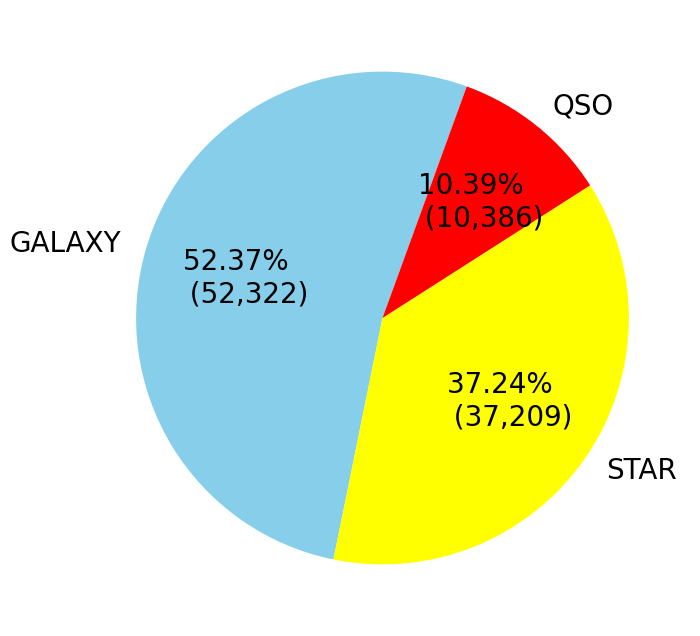

In [168]:
class_counts = df['class'].value_counts() #Calculates the number of objects in each class
index = class_counts.index #Give the unique names of the class
np.sum(class_counts)

#explode = (0.03,0.03,0.03)


plt.figure(figsize = (12, 8))
plt.pie(class_counts, autopct=lambda p : '{:.2f}% \n  ({:,.0f})'.format(p,p * sum(class_counts)/100),labels=index,colors=['skyblue','yellow','red'],textprops = {'fontsize': 20},startangle=70)


In [169]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'err_u', 'err_g',
       'err_r', 'err_i', 'err_z', 'specobjid', 'class', 'redshift', 'zErr',
       'plate', 'mjd', 'fiberid'],
      dtype='object')

In [170]:
#Numericall represent the class since it is in string format
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

class
0    52322
2    37209
1    10386
Name: count, dtype: int64

In [171]:
#X = df[['u','g','r', 'i', 'z','redshift',
#       'err_u', 'err_g','err_r', 'err_i', 'err_z','zErr']]

X = df[['u','g','redshift','err_u', 'err_g','zErr']]

#dX = df[['err_u', 'err_g','err_r', 'err_i', 'err_z','zErr']]
y = df['class']
X

,u,g,redshift,err_u,err_g,zErr
0,19.54587,18.20762,0.119489,0.044090,0.008275,0.000012
1,17.89789,16.95983,0.022601,0.013837,0.004129,0.000006
2,19.47581,17.98423,0.054417,0.047616,0.007394,0.000019
3,19.59742,18.22109,0.056572,0.036427,0.007086,0.000008
4,18.22961,17.18746,0.107618,0.022368,0.008362,0.000008
...,...,...,...,...,...,...
99995,17.94874,17.04882,-0.000296,0.010869,0.004157,0.000007
99996,19.23447,17.64933,0.114431,0.042653,0.006439,0.000018
99997,19.38132,18.94883,0.000045,0.029335,0.009571,0.000042
99998,17.33268,15.90426,0.000253,0.010089,0.003833,0.000009


In [172]:
y,y.shape

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 99995    2
 99996    0
 99997    2
 99998    2
 99999    2
 Name: class, Length: 99917, dtype: int64,
 (99917,))

In [173]:
#Oversample the data
sm = SMOTE(random_state = 30, k_neighbors = 5) 
X_over, y_over = sm.fit_resample(X, y)
y_over.value_counts(),y_over.value_counts().sum()

(class
 0    52322
 1    52322
 2    52322
 Name: count, dtype: int64,
 156966)

In [174]:
#Oversample QSO and STAR and undersamlple GALAXY
over = SMOTE(random_state = 30,k_neighbors = 5, sampling_strategy={ 1: 35000,2: 40000})
under = RandomUnderSampler(random_state = 30, sampling_strategy={ 0: 40000})
pipeline = make_pipeline(over,under)
X_ou,y_ou = pipeline.fit_resample(X,y)


#To overrilde SMOTE Oversampling (To keep SMOTE oversampling, comment the code below)
del X_over
del y_over

X_over = X_ou
y_over = y_ou

y_over.value_counts(),y_over.value_counts().sum()

(class
 0    40000
 2    40000
 1    35000
 Name: count, dtype: int64,
 115000)

In [175]:
X_over.shape, y_over.shape

((115000, 6), (115000,))

In [176]:
#First we will work with complete Oversample
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 30)
X_train

,u,g,redshift,err_u,err_g,zErr
51420,19.042550,18.563000,0.762030,0.021787,0.007922,0.000085
111574,17.256305,17.196409,0.167224,0.008880,0.004556,0.000023
83750,18.368870,16.957770,0.058578,0.033773,0.005978,0.000028
8933,18.028910,16.342780,-0.000278,0.012953,0.003676,0.000009
92854,18.035350,16.824850,0.000019,0.012753,0.003759,0.000008
...,...,...,...,...,...,...
59673,17.496560,16.498830,0.000327,0.008700,0.004487,0.000010
94480,17.219740,16.323110,-0.000214,0.007963,0.003845,0.000006
78788,18.020200,17.918570,1.967189,0.012148,0.005587,0.000355
119584,18.213834,18.004463,1.578689,0.013987,0.006177,0.000434


In [177]:

"""
dX_train= X_train[['err_u', 'err_g','err_r', 'err_i', 'err_z','zErr']]
X_train = X_train[['u','g','r', 'i', 'z','redshift']]

dX_test= X_test[['err_u', 'err_g','err_r', 'err_i', 'err_z','zErr']]
X_test = X_test[['u','g','r', 'i', 'z','redshift']]

"""


dX_train= X_train[['err_u', 'err_g','zErr']]
X_train = X_train[['u','g','redshift']]

dX_test= X_test[['err_u', 'err_g','zErr']]
X_test = X_test[['u','g','redshift']]

In [178]:
dX_train, X_train

(           err_u     err_g      zErr
 51420   0.021787  0.007922  0.000085
 111574  0.008880  0.004556  0.000023
 83750   0.033773  0.005978  0.000028
 8933    0.012953  0.003676  0.000009
 92854   0.012753  0.003759  0.000008
 ...          ...       ...       ...
 59673   0.008700  0.004487  0.000010
 94480   0.007963  0.003845  0.000006
 78788   0.012148  0.005587  0.000355
 119584  0.013987  0.006177  0.000434
 37099   0.054298  0.008771  0.000007
 
 [80500 rows x 3 columns],
                 u          g  redshift
 51420   19.042550  18.563000  0.762030
 111574  17.256305  17.196409  0.167224
 83750   18.368870  16.957770  0.058578
 8933    18.028910  16.342780 -0.000278
 92854   18.035350  16.824850  0.000019
 ...           ...        ...       ...
 59673   17.496560  16.498830  0.000327
 94480   17.219740  16.323110 -0.000214
 78788   18.020200  17.918570  1.967189
 119584  18.213834  18.004463  1.578689
 37099   18.984850  17.705520  0.072021
 
 [80500 rows x 3 columns])

In [179]:
dX_test, X_test

(           err_u     err_g      zErr
 42710   0.012816  0.004283  0.000012
 23838   0.029699  0.011532  0.000670
 108370  0.031343  0.012384  0.000207
 124824  0.014515  0.004932  0.000010
 13145   0.015048  0.004301  0.000007
 ...          ...       ...       ...
 102560  0.017684  0.008281  0.000299
 56257   0.043894  0.007088  0.000009
 96183   0.013602  0.006161  0.000109
 73958   0.015476  0.003700  0.000008
 117175  0.022855  0.008284  0.000248
 
 [34500 rows x 3 columns],
                 u          g  redshift
 42710   18.023940  16.947760  0.000011
 23838   19.425690  19.216000  1.773946
 108370  19.507527  19.523987  0.977455
 124824  18.246114  17.161224 -0.000133
 13145   18.471000  16.866760 -0.000490
 ...           ...        ...       ...
 102560  18.621965  18.677002  1.905623
 56257   18.218340  16.996060  0.067495
 96183   18.465810  18.111300  0.676892
 73958   18.476840  16.686800  0.000093
 117175  19.118912  18.706010  2.235555
 
 [34500 rows x 3 columns])

In [180]:
"""

scalar = StandardScaler()
scalar_err = StandardScaler()

#In order to train and test scalar fitting seperately, I first have to fit and transform train, and then transform test. 
#scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#Similarly for errors
dX_train = scalar_err.fit_transform(dX_train)
dX_test = scalar_err.transform(dX_test)

"""


'\n\nscalar = StandardScaler()\nscalar_err = StandardScaler()\n\n#In order to train and test scalar fitting seperately, I first have to fit and transform train, and then transform test. \n#scalar = StandardScaler()\nX_train = scalar.fit_transform(X_train)\nX_test = scalar.transform(X_test)\n\n#Similarly for errors\ndX_train = scalar_err.fit_transform(dX_train)\ndX_test = scalar_err.transform(dX_test)\n\n'

In [181]:
X_train.shape, dX_train.shape, y_train.shape

((80500, 3), (80500, 3), (80500,))

In [182]:
X_train.isnull().values.any()

False

In [183]:
dX_train

,err_u,err_g,zErr
51420,0.021787,0.007922,0.000085
111574,0.008880,0.004556,0.000023
83750,0.033773,0.005978,0.000028
8933,0.012953,0.003676,0.000009
92854,0.012753,0.003759,0.000008
...,...,...,...
59673,0.008700,0.004487,0.000010
94480,0.007963,0.003845,0.000006
78788,0.012148,0.005587,0.000355
119584,0.013987,0.006177,0.000434


In [184]:
#X_train = X_train.to_numpy()
#X_train

In [185]:
X_train.shape,y_train.shape

((80500, 3), (80500,))

In [186]:
X_train

,u,g,redshift
51420,19.042550,18.563000,0.762030
111574,17.256305,17.196409,0.167224
83750,18.368870,16.957770,0.058578
8933,18.028910,16.342780,-0.000278
92854,18.035350,16.824850,0.000019
...,...,...,...
59673,17.496560,16.498830,0.000327
94480,17.219740,16.323110,-0.000214
78788,18.020200,17.918570,1.967189
119584,18.213834,18.004463,1.578689


In [187]:
prf_cls = prf(n_estimators=10, bootstrap=True, keep_proba=0.05, n_jobs=2)


In [188]:
prf_cls.fit(X=X_train.to_numpy(), y=y_train.to_numpy())
y_pred = prf_cls.predict(X=X_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 98.84


In [189]:
y_test.unique(),LE.inverse_transform(y_test.unique())

(array([2, 1, 0]), array(['STAR', 'QSO', 'GALAXY'], dtype=object))

In [190]:
print(classification_report(y_test, y_pred,target_names=LE.inverse_transform(y_test.unique())))

              precision    recall  f1-score   support

        STAR       0.98      0.99      0.98     12082
         QSO       0.99      0.97      0.98     10489
      GALAXY       1.00      1.00      1.00     11929

    accuracy                           0.99     34500
   macro avg       0.99      0.99      0.99     34500
weighted avg       0.99      0.99      0.99     34500



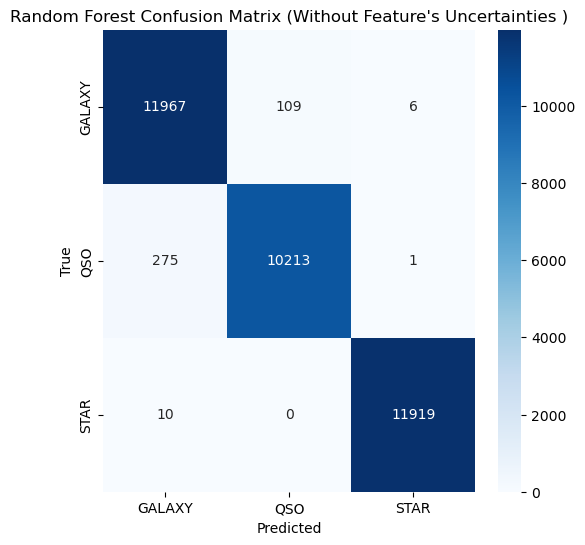

In [191]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'Blues', xticklabels = sorted(LE.inverse_transform(y_test.unique())), yticklabels = sorted(LE.inverse_transform(y_test.unique())))
plt.title("Random Forest Confusion Matrix (Without Feature's Uncertainties )")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [192]:
prf_cls.fit(X=X_train.to_numpy(), dX=dX_train.to_numpy(), y=y_train.to_numpy())
y_pred = prf_cls.predict(X=X_test.to_numpy(),dX=dX_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.65


In [193]:
print(classification_report(y_test, y_pred,target_names=LE.inverse_transform(y_test.unique())))

              precision    recall  f1-score   support

        STAR       0.98      0.99      0.98     12082
         QSO       0.99      0.97      0.98     10489
      GALAXY       1.00      1.00      1.00     11929

    accuracy                           0.99     34500
   macro avg       0.99      0.99      0.99     34500
weighted avg       0.99      0.99      0.99     34500



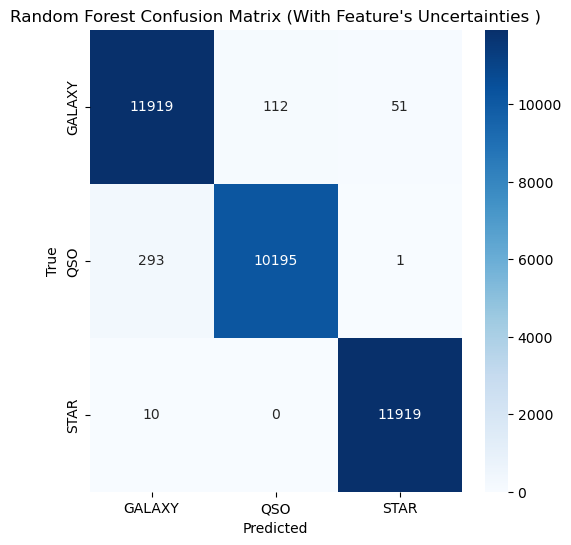

In [194]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'Blues', xticklabels = sorted(LE.inverse_transform(y_test.unique())), yticklabels = sorted(LE.inverse_transform(y_test.unique())))
plt.title("Random Forest Confusion Matrix (With Feature's Uncertainties )")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [195]:
"""

Removing some columns does indeed reduce the accuracy of the model, Especially if we remove the redshift column.

Although, even if I reduce the number of clolumns to just u,g,r,i, I get a 94% accuracy

just u and g gives a 73% (without uncertainty) and 79% (with uncertainty) accuracy. Adding redshift increases the accuracy significantly, 
all the way to 98% wtf.
"""

'\n\nRemoving some columns does indeed reduce the accuracy of the model, Especially if we remove the redshift column.\n\nAlthough, even if I reduce the number of clolumns to just u,g,r,i, I get a 94% accuracy\n\njust u and g gives a 73% (without uncertainty) and 79% (with uncertainty) accuracy. Adding redshift increases the accuracy \n'